In [980]:
import matplotlib.pyplot as plt
import sys

In [1048]:
def graph(n, to_ignore=[]):
    timings = []
    min_delivered = sys.maxsize
    for i in range(n):
        with open(f'logs/proc{i+1:02}.stderr', 'r') as f:
            lines = f.readlines()
        ms = [int(l.strip())*1e-3 for l in lines]

        plt.plot(ms, range(len(ms)))
        timings.append(ms[-1]/len(ms))
        if i+1 not in to_ignore:
            min_delivered = min(len(ms), min_delivered)
    mean_timing = sum(timings)/len(timings)
    unit = 'µs'
    if mean_timing / 1000 > 1:
        mean_timing /= 1000
        unit = 'ms'
    print(f' - {mean_timing:.4} {unit} per delivered messages (min. {min_delivered} messages delivered)')

 - 253.75 µs per delivered messages (min. 2000000 messages delivered)


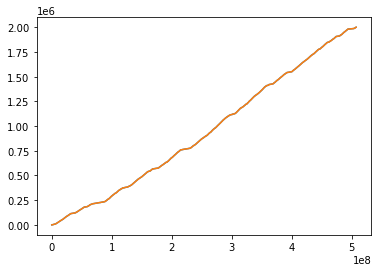

In [987]:
graph(2)

 - 687.75 µs per delivered messages (min. 500000 messages delivered)


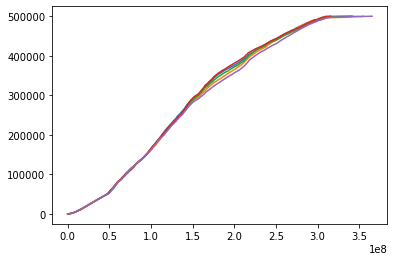

In [1009]:
graph(5)

 - 7.181 ms per delivered messages (min. 50000 messages delivered)


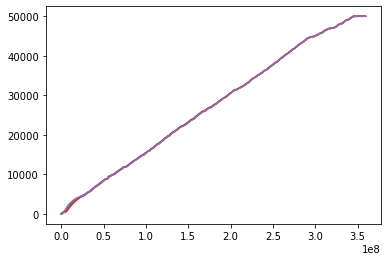

In [1029]:
# with stress test
graph(5)

 - 6.546 ms per delivered messages (min. 40310 messages delivered)


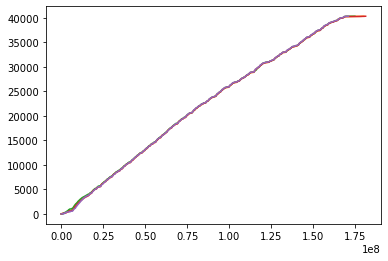

In [1045]:
graph(5, [1])

 - 2.351 ms per delivered messages (min. 10000 messages delivered)


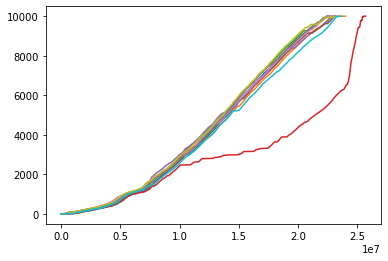

In [1049]:
graph(10)